In [1]:
import collections
import math
import re
import requests
import json
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from personal import SESSION, LEADERBOARD_URL

In [3]:
data = json.loads(requests.get(
    LEADERBOARD_URL,
    cookies = {'session': SESSION},
).text)

In [4]:
df = pd.DataFrame(data['members']).T.sort_values(by='local_score', ascending=False)
df['name'].replace(np.nan, 'Unknown', inplace=True)
df = df.set_index('name', drop=True)

In [5]:
days_keys = range(1, datetime.now().day+1)

In [6]:
for i in days_keys:
    df[f'{i!s}#1'] = 0
    df[f'{i!s}#2'] = 0
    df[f'{i!s}#1.classement'] = 0
    df[f'{i!s}#2.classement'] = 0
    df[f'{i!s}.duration'] = 0
    df[f'{i!s}.pts'] = 0

In [7]:
for idv,v in df['completion_day_level'].iteritems():
    for day, stars in v.items():
        for star, time in stars.items():
            df.loc[idv, f'{day!s}#{star!s}'] = int(time['get_star_ts'])

In [8]:
del df['completion_day_level']

In [9]:
pts_memory = [0]*len(df)
for i in days_keys:
    for j in range(1, 3):
        # order
        order = list(filter(lambda x: x > 0, set(df[f'{i}#{j}'].values)))
        order.sort()
        df[f'{i}#{j}.classement'] = [order.index(v)+1 if v in order else len(order)+1 for v in df[f'{i}#{j}']]
        df[f'{i}#{j}.pts'] = [len(df)-order.index(v) if v in order else 0 for v in df[f'{i}#{j}']]
        
    if i > 1: # No points for first day
        # duration
        df[f'{i!s}.duration'] = round((df[f'{i!s}#2'] - df[f'{i!s}#1'])/60, 2)
        df[f'{i!s}.duration'][df[f'{i!s}.duration'] <= 0] = np.NaN
        pts_memory = df[f'{i}#1.pts'] + df[f'{i}#2.pts'] + pts_memory
        df[f'{i!s}.pts'] = pts_memory
        # total order
        total_order = list(filter(lambda x: x > 0, set(df[f'{i!s}.pts'].values)))
        total_order.sort(reverse=True)
        df[f'{i}.classement'] = [total_order.index(v)+1 if v in total_order else len(total_order)+1 for v in df[f'{i!s}.pts']]

<ipython-input-9-a8cd10ca20d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{i!s}.duration'][df[f'{i!s}.duration'] <= 0] = np.NaN


In [23]:
watch_list = ['Alexandre Dewilde', 'Brieuc Dubois']

## Classement journalier

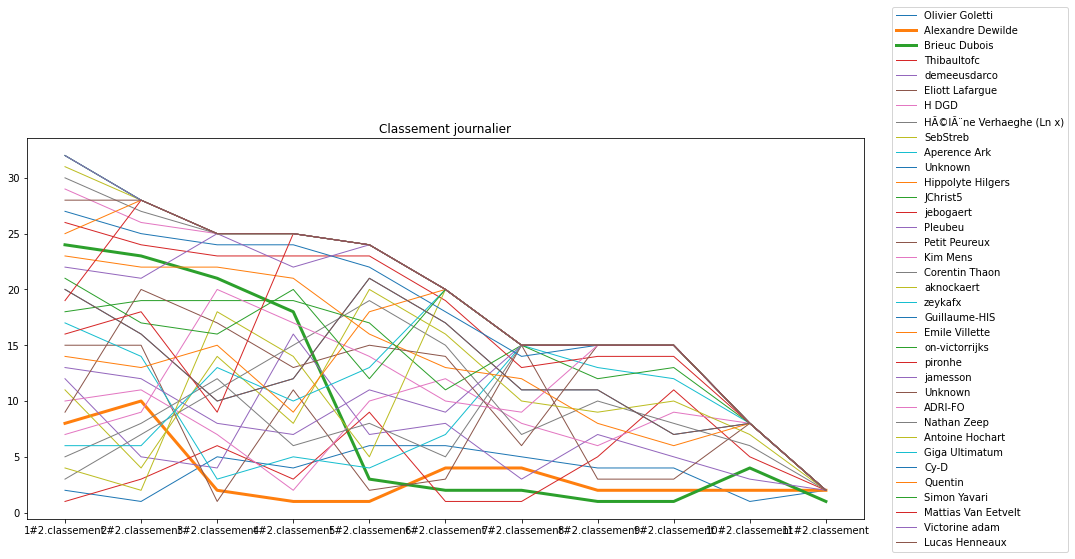

In [28]:
plt.figure(figsize=(15, 7))
plt.title('Classement journalier')
for name, data in df.filter(regex=(r'\d+?#2\.classement')).iterrows():
    if name in watch_list: lw = 3
    else: lw = 1
    plt.plot(data, label=name, linewidth=lw)
_ = plt.legend(bbox_to_anchor=(1.25, -0.1), loc="lower right")

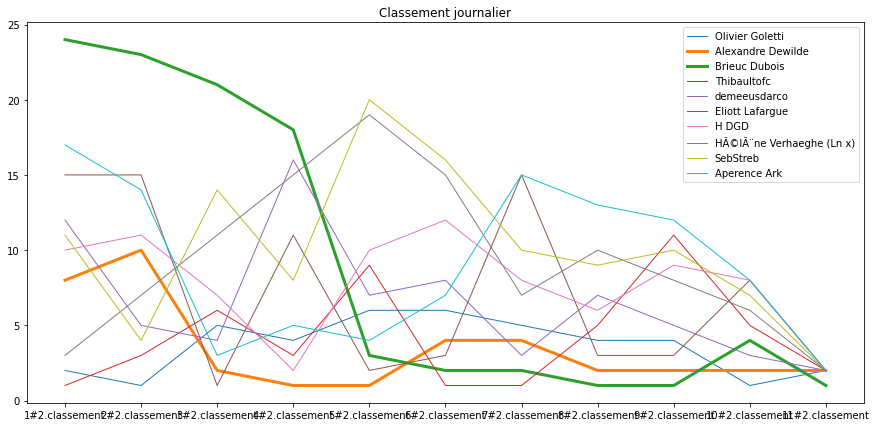

In [24]:
plt.figure(figsize=(15, 7))
plt.title('Classement journalier')
for name, data in df.filter(regex=(r'\d+?#2\.classement')).head(10).iterrows():
    if name in watch_list: lw = 3
    else: lw = 1
    plt.plot(data, label=name, linewidth=lw)
_ = plt.legend()

## Durée entre le premier le second exercice

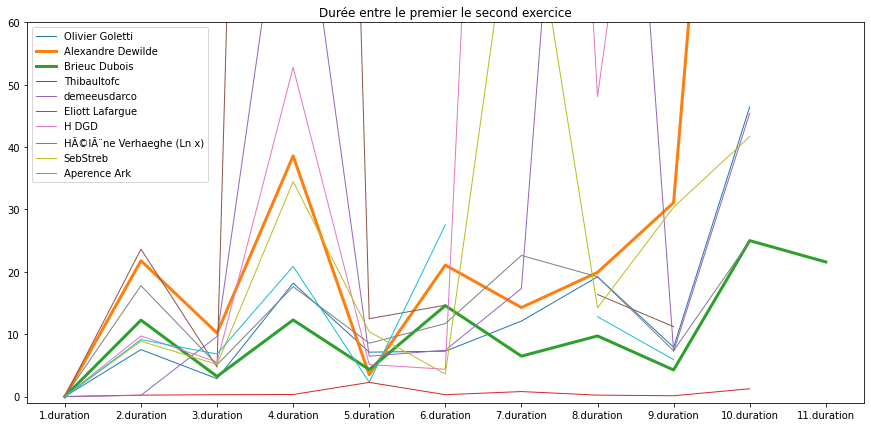

In [22]:
plt.figure(figsize=(15, 7))
plt.title('Durée entre le premier le second exercice')
plt.ylim(-1, 60)
#plt.yscale('log', basey=2)
for name, data in df.filter(regex=(r'\d+?\.duration')).head(10).iterrows():
    if name in watch_list: lw = 3
    else: lw = 1
    plt.plot(data, label=name, linewidth=lw)
_ = plt.legend()

## Évolution du classement

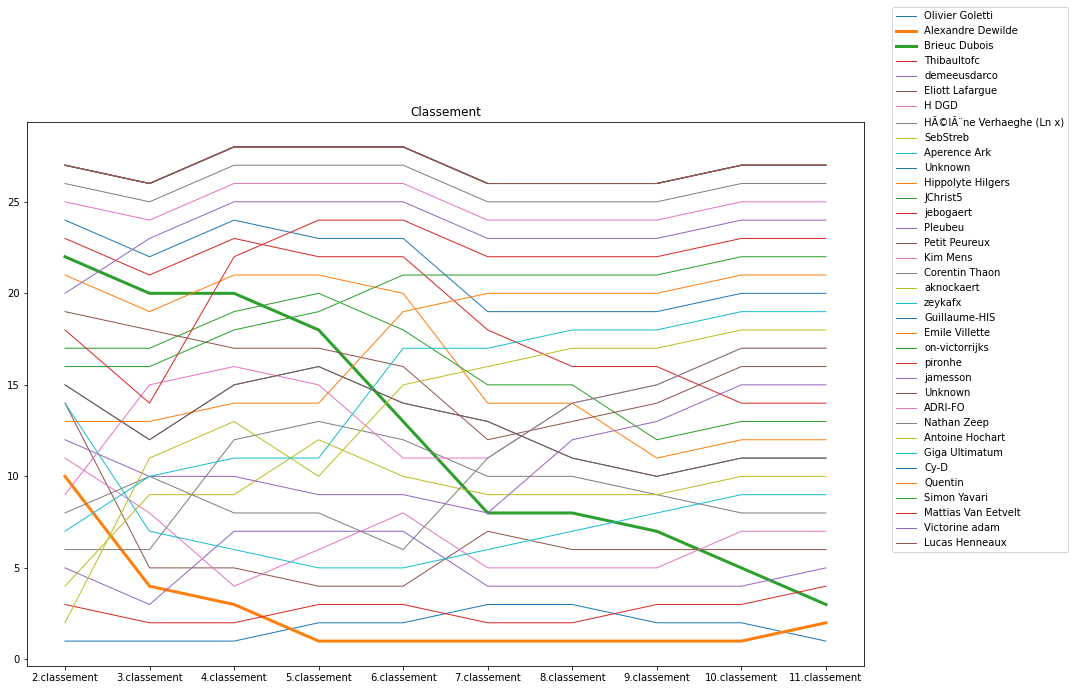

In [16]:
plt.figure(figsize=(15, 10))
plt.title('Classement')
for name, data in df.filter(regex=(r'^\d+?\.classement$')).iterrows():
    if name in watch_list: lw = 3
    else: lw = 1
    plt.plot(data, label=name, linewidth=lw)
_ = plt.legend(bbox_to_anchor=(1.25, 0.2), loc="lower right")

In [18]:
durations = df.filter(regex='\d+?.duration')
del durations['1.duration']
durations = durations.drop('Thibaultofc')
durations['2.duration'].loc['demeeusdarco'] = np.NaN
durations['3.duration'].loc['zeykafx'] = np.NaN

In [19]:
med = durations/durations.median()

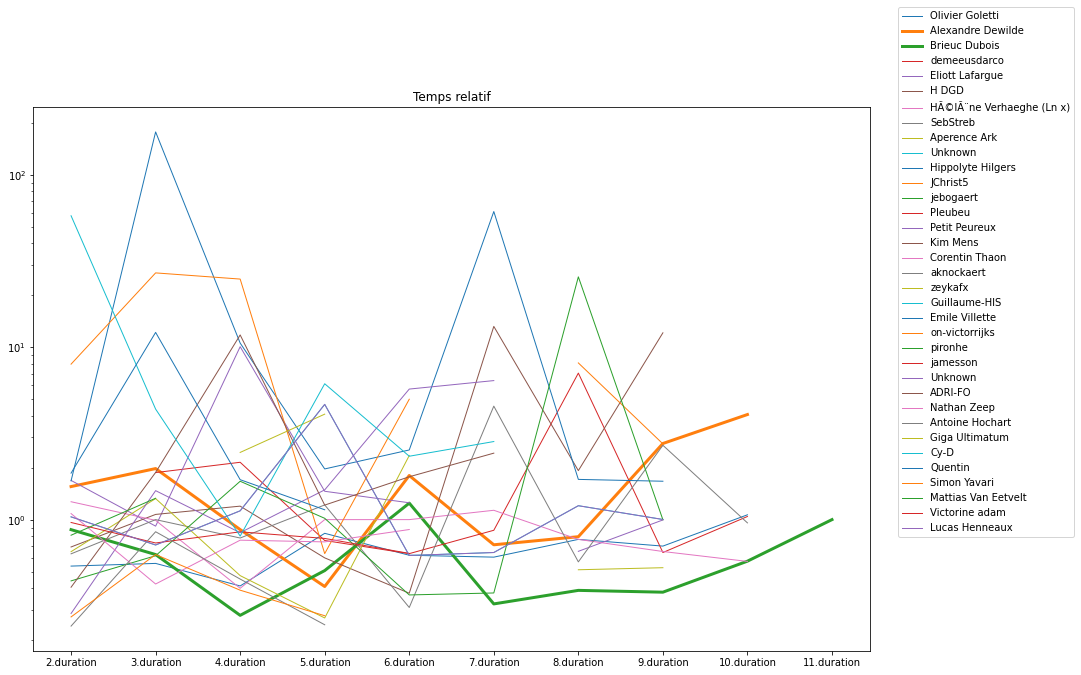

In [20]:
plt.figure(figsize=(15, 10))
plt.title('Temps relatif')
#plt.ylim(-0.5, 4)
plt.yscale('log', basey=10)
for name, data in med.iterrows():
    if name in watch_list: lw = 3
    else: lw = 1
    plt.plot(data, label=name, linewidth=lw)
_ = plt.legend(bbox_to_anchor=(1.25, 0.2), loc="lower right")

In [21]:
from fractions import Fraction
from matplotlib import pyplot as plt

In [47]:
a, b, c = 9, 4, 6

In [92]:
def suite(frac, n):
    c = 0
    while c*frac.numerator <= n:
        yield c*frac.numerator
        c += 1

In [137]:
def m1(n):
    i = 0
    poss = []
    for x in filter(lambda x: not x%Fraction(c,a).numerator, range(n)):
        for y in suite(Fraction(c,b), n):
            i += 1
            z = int((a*x + b*y)/c)
            if z >= n:
                break
            # print(f'x={x} y={y} z={z}')
    return i

In [138]:
def m2(n):
    j = 0
    for x in range(n):
        for y in range(n):
            for z in range(n):
                j+=1
                if a*x + b*y == c*z:
                    pass # print(f'x={x} y={y} z={z}')
    return j

In [167]:
m1m = []
m2m = []
for i in range(100):
    m1m.append(m1(i))
    m2m.append(m2(i))

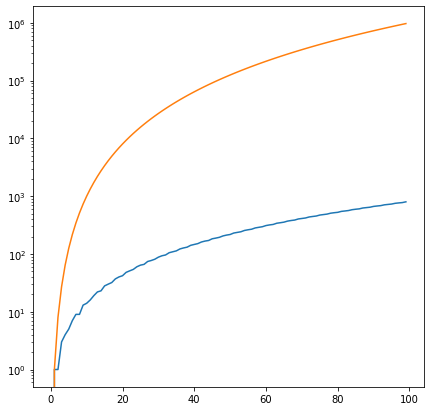

In [168]:
plt.figure(figsize=(7,7))
plt.yscale('log', basey=10)
plt.plot(m1m)
plt.plot(m2m)

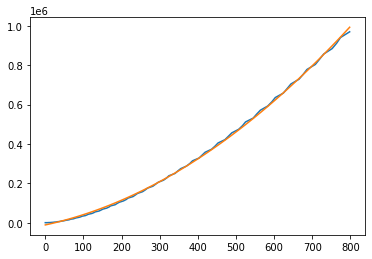

In [169]:
plt.plot(m1m, m2m)
mymodel = np.poly1d(np.polyfit(m1m, m2m, 2))
plt.plot(m1m, mymodel(m1m))

In [174]:
n**2 * 1.055 + n * 417.4 - 11400

poly1d([ 1.05486526e+00,  4.17399578e+02, -1.14022362e+04])